In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, CategoricalNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Load data
data_train = pd.read_csv('spam.train.dat', delimiter=' ', header=None) 
data_test = pd.read_csv('spam.test.dat', delimiter=' ', header=None) 

# Split train data and labels (last column: labels) 
# COnvert dataframes to numpy arrays
trainx = data_train.iloc[:, :-1].to_numpy()
trainy = data_train.iloc[:, -1].to_numpy()
testx = data_test.iloc[:, :-1].to_numpy()
testy = data_test.iloc[:, -1].to_numpy()

In [6]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,0.00,0.00,0.00,0.00,0.05,0.00,0.34,0.0,0.00,...,0.283,0.107,0.000,0.000,0.053,0.000,1.864,32,910,0
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.406,7,45,0
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.400,3,7,0
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.136,0.000,0.000,0.000,0.000,1.988,24,179,0
4,0.0,0.35,0.71,0.00,0.35,0.00,0.17,0.00,0.0,0.53,...,0.000,0.027,0.000,0.167,0.027,0.055,7.527,149,956,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.740,0.000,0.000,1.625,6,13,0
2996,0.0,0.00,0.00,1.29,1.29,0.00,0.00,0.00,0.0,0.00,...,0.187,0.000,0.000,0.936,0.000,0.000,4.586,24,133,1
2997,0.2,0.00,0.20,0.00,0.40,0.00,0.00,0.00,0.0,0.00,...,0.000,0.042,0.000,0.014,0.000,0.000,4.325,63,545,0
2998,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.365,0.000,0.365,0.182,0.000,3.343,28,107,1


In [3]:
def do_nothing(train, test):
    return train, test

def do_std(train, test):
    # Create an instance of the StandardScaler
    scaler = StandardScaler()
    
    # Fit the scaler to your data and transform the data
    train = scaler.fit_transform(train)
    
    # Transform the test data using the same scaler
    test = scaler.transform(test)
    
    return train, test
    
def do_log(train, test):
    # smoothed natural logarithm transformation
    train = np.log(train + 0.1)
    test = np.log(test + 0.1)
    
    return train, test

def do_bin(train, test):
    # Otherwise Initial dataset changes
    train1 = train.copy()
    test1 = test.copy()
    
    # apply indicator function
    train1[train > 0] = 1
    train1[train <= 0] = 0
    
    test1[test > 0] = 1
    test1[test <= 0] = 0
    
    return train1, test1

In [4]:
# Apply transformations on train and test datasets
trainx, testx = do_nothing(trainx, testx)
trainx_std, testx_std = do_std(trainx, testx)
trainx_log, testx_log = do_log(trainx, testx)
trainx_bin, testx_bin = do_bin(trainx, testx)

In [121]:
def eval_nb(trainx, trainy, testx, testy):
    # Choose Gaussian, Multinomial, or Bernoulli Naive Bayes classifier
    # uncomment the one you want to try
    nb_classifier = BernoulliNB()
#     nb_classifier = GaussianNB()
#     nb_classifier = MultinomialNB()
#     nb_classifier = CategoricalNB()
#     nb_classifier = ComplementNB()
    
    # Create and train the classifier
    nb_classifier.fit(trainx, trainy)
    
    # Make predictions on the train and test data
    trainy_predict = nb_classifier.predict(trainx)
    testy_predict = nb_classifier.predict(testx)
    
    # Evaluate the model
    train_accuracy = accuracy_score(trainy, trainy_predict)
    test_accuracy = accuracy_score(testy, testy_predict)
    
    # Calculate the predicted probabilities for class 1
    trainy_prob = nb_classifier.predict_proba(trainx)[:, 1]
    testy_prob = nb_classifier.predict_proba(testx)[:, 1]
    
    # Calculate the AUC score
    train_auc_score = roc_auc_score(trainy, trainy_prob)
    test_auc_score = roc_auc_score(testy, testy_prob)
    
    return {'train-acc':train_accuracy, 'train-auc':train_auc_score, 'test-acc':test_accuracy, 
           'test-auc':test_auc_score, 'test-prob':testy_prob}

In [9]:
print('Bernoulli Naive Bayes')
print('-----------------------------------------')

# do nothing: raw dataset
print('After do_nothing preprocessing function: ')
print(eval_nb(trainx, trainy, testx, testy))
print('-----------------------------------------')

# z-score normalization
print('After do_std preprocessing function: ')
print(eval_nb(trainx_std, trainy, testx_std, testy))
print('-----------------------------------------')

# logarithm transformation
print('After do_log preprocessing function: ')
print(eval_nb(trainx_log, trainy, testx_log, testy))
print('-----------------------------------------')

# indicator function transformation
print('After do_bin preprocessing function: ')
print(eval_nb(trainx_bin, trainy, testx_bin, testy))
print('-----------------------------------------')

Bernoulli Naive Bayes
-----------------------------------------
After do_nothing preprocessing function: 
{'train-acc': 0.8886666666666667, 'train-auc': 0.9530898227654153, 'test_acc': 0.8844472204871955, 'test-auc': 0.9534414879393277, 'test-prob': array([3.25728308e-05, 7.49295956e-17, 7.75712242e-07, ...,
       9.99973843e-01, 7.86570302e-01, 3.25728308e-05])}
-----------------------------------------
After do_std preprocessing function: 
{'train-acc': 0.9043333333333333, 'train-auc': 0.9631711077020715, 'test_acc': 0.9006870705808869, 'test-auc': 0.9598229963046372, 'test-prob': array([4.16190015e-04, 1.97937088e-18, 2.09559234e-07, ...,
       9.99999866e-01, 9.34086640e-01, 4.16190015e-04])}
-----------------------------------------
After do_log preprocessing function: 
{'train-acc': 0.868, 'train-auc': 0.9341627689078076, 'test_acc': 0.8675827607745159, 'test-auc': 0.9332297536317331, 'test-prob': array([9.86063158e-02, 1.65233009e-05, 5.54867000e-05, ...,
       8.43094217e-01

In [122]:
def eval_lr(trainx, trainy, testx, testy):
    # turn off warnings
    import warnings
    warnings.filterwarnings('ignore')
    
    # Create the Logistic Regression model
    logistic_regression_model = LogisticRegression()
    
    # Train the model on the training data
    logistic_regression_model.fit(trainx, trainy)
    
    # Make predictions on the test data
    trainy_predict = logistic_regression_model.predict(trainx)
    testy_predict = logistic_regression_model.predict(testx)
    
    # Evaluate the model
    train_accuracy = accuracy_score(trainy, trainy_predict)
    test_accuracy = accuracy_score(testy, testy_predict)
    
    # Calculate the predicted probabilities for class 1
    trainy_prob = logistic_regression_model.predict_proba(trainx)[:, 1]
    testy_prob = logistic_regression_model.predict_proba(testx)[:, 1]
    
    # Calculate the AUC score
    train_auc_score = roc_auc_score(trainy, trainy_prob)
    test_auc_score = roc_auc_score(testy, testy_prob)
    
    return {'train-acc':train_accuracy, 'train-auc':train_auc_score, 'test-acc':test_accuracy, 
           'test-auc':test_auc_score, 'test-prob':testy_prob}

In [12]:
print('Logistic Regression')
print('-----------------------------------------')
# do nothing: raw dataset
print('After do_nothing preprocessing function: ')
print(eval_lr(trainx, trainy, testx, testy))
print('-----------------------------------------')
# z-score normalization
print('After do_std preprocessing function: ')
print(eval_lr(trainx_std, trainy, testx_std, testy))
print('-----------------------------------------')
# logarithm transformation
print('After do_log preprocessing function: ')
print(eval_lr(trainx_log, trainy, testx_log, testy))
print('-----------------------------------------')
# indicator function transformation
print('After do_bin preprocessing function: ')
print(eval_lr(trainx_bin, trainy, testx_bin, testy))
print('-----------------------------------------')

Logistic Regression
-----------------------------------------
After do_nothing preprocessing function: 
{'train-acc': 0.9246666666666666, 'train-auc': 0.9677824646854598, 'test_acc': 0.9231730168644597, 'test-auc': 0.9651469607492532, 'test-prob': array([2.18631898e-01, 2.67612041e-08, 1.56479325e-03, ...,
       8.47963071e-01, 5.65318329e-01, 1.97097002e-01])}
-----------------------------------------
After do_std preprocessing function: 
{'train-acc': 0.9323333333333333, 'train-auc': 0.9766108650302027, 'test_acc': 0.9206745783885072, 'test-auc': 0.969412575832262, 'test-prob': array([1.73353319e-01, 5.15110010e-07, 9.02897348e-03, ...,
       9.17079269e-01, 6.42492781e-01, 1.62751913e-01])}
-----------------------------------------
After do_log preprocessing function: 
{'train-acc': 0.9486666666666667, 'train-auc': 0.9851829615206236, 'test_acc': 0.9381636477201749, 'test-auc': 0.983591557690511, 'test-prob': array([8.43293107e-02, 9.73634192e-05, 1.33533362e-02, ...,
       9.939

In [13]:
def eval_nb_roc(trainx, trainy, testx, testy):
    # Choose Gaussian, Multinomial, or Bernoulli Naive Bayes classifier
    # uncomment the one you want to try
    nb_classifier = BernoulliNB()
#     nb_classifier = GaussianNB()
#     nb_classifier = MultinomialNB()
    
    # Create and train the classifier
    nb_classifier.fit(trainx, trainy)
    
    # Make predictions on the train and test data
    trainy_predict = nb_classifier.predict(trainx)
    testy_predict = nb_classifier.predict(testx)
    
    # Evaluate the model
    train_accuracy = accuracy_score(trainy, trainy_predict)
    test_accuracy = accuracy_score(testy, testy_predict)
    
    # Calculate the predicted probabilities for class 1
    trainy_prob = nb_classifier.predict_proba(trainx)[:, 1]
    testy_prob = nb_classifier.predict_proba(testx)[:, 1]
    
    # Calculate the AUC score
    train_auc_score = roc_auc_score(trainy, trainy_prob)
    test_auc_score = roc_auc_score(testy, testy_prob)
    
    # Calculate fpr and tpr
    fpr, tpr, _ = roc_curve(testy, testy_prob)
    
    return fpr, tpr

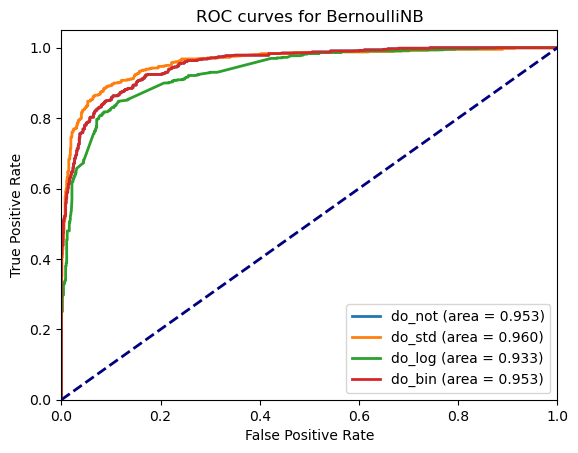

In [14]:
# Compute FPR and TPR for each preprocessing method
# do nothing: raw dataset
fpr, tpr = eval_nb_roc(trainx, trainy, testx, testy)
roc_auc = auc(fpr, tpr)
# z-score normalization
fpr_std, tpr_std = eval_nb_roc(trainx_std, trainy, testx_std, testy)
roc_auc_std = auc(fpr_std, tpr_std)
# logarithm transformation
fpr_log, tpr_log = eval_nb_roc(trainx_log, trainy, testx_log, testy)
roc_auc_log = auc(fpr_log, tpr_log)
# indicator function transformation
fpr_bin, tpr_bin = eval_nb_roc(trainx_bin, trainy, testx_bin, testy)
roc_auc_bin = auc(fpr_bin, tpr_bin)

# Create ROC plot
plt.figure()
plt.plot(fpr, tpr, lw=2, label='do_not (area = %0.3f)' % roc_auc)
plt.plot(fpr_std, tpr_std, lw=2, label='do_std (area = %0.3f)' % roc_auc_std)
plt.plot(fpr_log, tpr_log, lw=2, label='do_log (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_bin, tpr_bin, lw=2, label='do_bin (area = %0.3f)' % roc_auc_bin)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for BernoulliNB')
plt.legend(loc='lower right')
plt.show()

In [139]:
def eval_Model(trainx, trainy, testx, testy, Model):
    # Choose Gaussian, Multinomial, or Bernoulli Naive Bayes classifier
    # uncomment the one you want to try
    classifier = Model
#     nb_classifier = GaussianNB()
#     nb_classifier = MultinomialNB()
    
    # Create and train the classifier
    classifier.fit(trainx, trainy)
    
    # Make predictions on the train and test data
    trainy_predict = classifier.predict(trainx)
    testy_predict = classifier.predict(testx)
    
    # Evaluate the model
    train_accuracy = accuracy_score(trainy, trainy_predict)
    test_accuracy = accuracy_score(testy, testy_predict)
    
    # Calculate the predicted probabilities for class 1
    trainy_prob = classifier.predict_proba(trainx)[:, 1]
    testy_prob = classifier.predict_proba(testx)[:, 1]
    
    # Calculate the AUC score
    train_auc_score = roc_auc_score(trainy, trainy_prob)
    test_auc_score = roc_auc_score(testy, testy_prob)
    
    # Calculate fpr and tpr
    fpr, tpr, _ = roc_curve(testy, testy_prob)
    
    return fpr, tpr

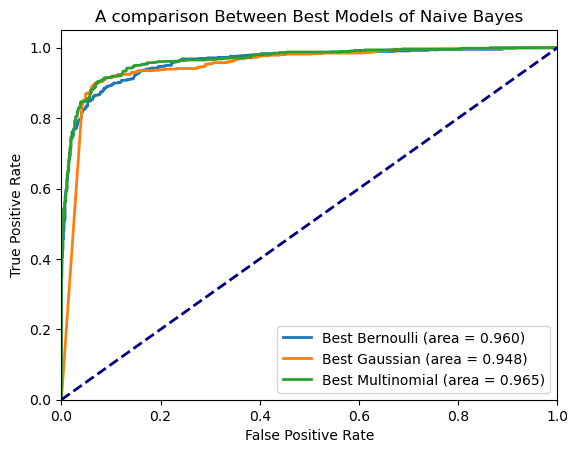

In [16]:
# Multinomial do_bin
fpr_bin, tpr_bin = eval_Model(trainx_bin, trainy, testx_bin, testy, MultinomialNB())
roc_auc_bin = auc(fpr_bin, tpr_bin)
# Bernoulli do_std
fpr_std, tpr_std = eval_Model(trainx_std, trainy, testx_std, testy, BernoulliNB())
roc_auc_std = auc(fpr_std, tpr_std)
# Gaussian do_log
fpr_log, tpr_log = eval_Model(trainx_log, trainy, testx_log, testy, GaussianNB())
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_std, tpr_std, lw=2, label='Best Bernoulli (area = %0.3f)' % roc_auc_std)
plt.plot(fpr_log, tpr_log, lw=2, label='Best Gaussian (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_bin, tpr_bin, lw=2, label='Best Multinomial (area = %0.3f)' % roc_auc_bin)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A comparison Between Best Models of Naive Bayes')
plt.legend(loc='lower right')
plt.show()

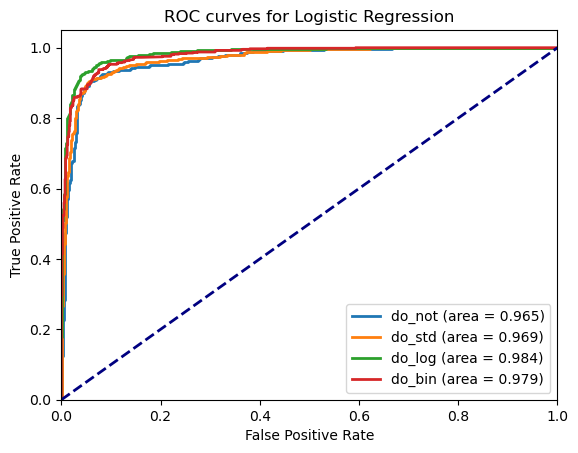

In [17]:
# Compute FPR and TPR for each preprocessing method
# do nothing: raw dataset
fpr, tpr = eval_Model(trainx, trainy, testx, testy, LogisticRegression())
roc_auc = auc(fpr, tpr)
# z-score normalization
fpr_std, tpr_std = eval_Model(trainx_std, trainy, testx_std, testy, LogisticRegression())
roc_auc_std = auc(fpr_std, tpr_std)
# logarithm transformation
fpr_log, tpr_log = eval_Model(trainx_log, trainy, testx_log, testy, LogisticRegression())
roc_auc_log = auc(fpr_log, tpr_log)
# indicator function transformation
fpr_bin, tpr_bin = eval_Model(trainx_bin, trainy, testx_bin, testy, LogisticRegression())
roc_auc_bin = auc(fpr_bin, tpr_bin)

# Create ROC plot
plt.figure()
plt.plot(fpr, tpr, lw=2, label='do_not (area = %0.3f)' % roc_auc)
plt.plot(fpr_std, tpr_std, lw=2, label='do_std (area = %0.3f)' % roc_auc_std)
plt.plot(fpr_log, tpr_log, lw=2, label='do_log (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_bin, tpr_bin, lw=2, label='do_bin (area = %0.3f)' % roc_auc_bin)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

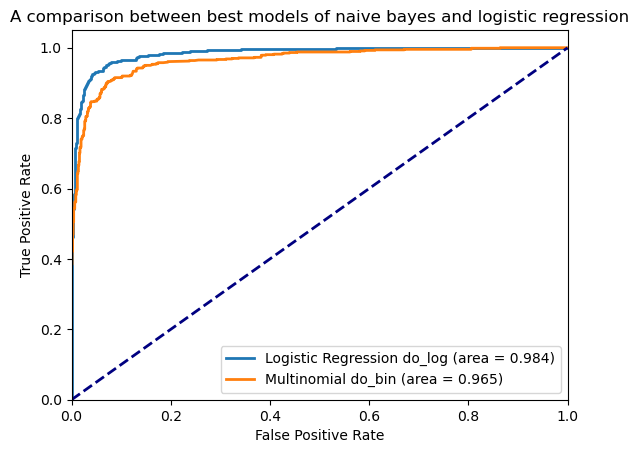

In [18]:
# Logistic Regression do_log
fpr_log, tpr_log = eval_Model(trainx_log, trainy, testx_log, testy, LogisticRegression())
roc_auc_log = auc(fpr_log, tpr_log)
# Multinomial do_bin
fpr_bin, tpr_bin = eval_Model(trainx_bin, trainy, testx_bin, testy, MultinomialNB())
roc_auc_bin = auc(fpr_bin, tpr_bin)

# Create ROC plot
plt.figure()
plt.plot(fpr_log, tpr_log, lw=2, label='Logistic Regression do_log (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_bin, tpr_bin, lw=2, label='Multinomial do_bin (area = %0.3f)' % roc_auc_bin)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A comparison between best models of naive bayes and logistic regression')
plt.legend(loc='lower right')
plt.show()

In [71]:
def generate_train_val(x, y, valsize):
    # number of samples for validation dataset
    n_samples = int(valsize * x.shape[0]) 
    
    # rows indices to be selected randomly
    val_indices = np.random.choice(x.shape[0], n_samples, replace=False) # validation indices
    # retrieve other indices that are not present in val_indices for train_indices 
    all_indices = np.arange(x.shape[0])
    train_indices = np.setdiff1d(all_indices, val_indices) # train indices
    
    # Crete training and validation datasets
    # train
    x_train = x[train_indices, :]
    y_train = y[train_indices]
    
    # validation
    x_val = x[val_indices, :]
    y_val = y[val_indices]
    
    return {'train-x':x_train, 'train-y':y_train, 'val-x':x_val, 'val-y':y_val}

In [77]:
def generate_kfold(x, y, k):
    # assign the first k elements with random_indices for the first fold, and so on. 
    random_indices = np.random.choice(x.shape[0], x.shape[0], replace=False)
    
    # number of samples in each fold
    n_samples = x.shape[0] // k
    
    fold = np.zeros(x.shape[0])
    for i in range(k):
        fold_indices = random_indices[i * n_samples:(i + 1) * n_samples]
        fold[fold_indices] = i
    
    if x.shape[0] % k != 0:
        # remaining samples
        r_samples = x.shape[0] % k
        r_indices = np.random.choice(k, r_samples, replace=False)
        fold[random_indices[-r_samples:]] = r_indices

    return fold

In [73]:
def eval_holdout(x, y, valsize, logistic):
    # split data into train and validation
    datasets = generate_train_val(x, y, valsize)
    x_train = datasets['train-x']
    y_train = datasets['train-y']
    x_val = datasets['val-x']
    y_val = datasets['val-y']
    
    # Train the model on the training data
    logistic.fit(x_train, y_train)
    
    # Make predictions on the test data
    trainy_predict = logistic.predict(x_train)
    valy_predict = logistic.predict(x_val)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, trainy_predict)
    val_accuracy = accuracy_score(y_val, valy_predict)
    
    # Calculate the predicted probabilities for class 1
    trainy_prob = logistic.predict_proba(x_train)[:, 1]
    valy_prob = logistic.predict_proba(x_val)[:, 1]
    
    # Calculate the AUC score
    train_auc_score = roc_auc_score(y_train, trainy_prob)
    val_auc_score = roc_auc_score(y_val, valy_prob)
    
    return {'train-acc':train_accuracy, 'train-auc':train_auc_score, 'val-acc':val_accuracy, 'val-auc':val_auc_score}

In [74]:
model = LogisticRegression()
eval_holdout(trainx, trainy, 0.2, model)

{'train-acc': 0.9304166666666667,
 'train-auc': 0.9709280106449854,
 'val-acc': 0.9066666666666666,
 'val-auc': 0.9551965649526626}

In [75]:
def eval_kfold(x, y, k, logistic):
    # do k-fold cross validation
    # assign fold indices
    fold = generate_kfold(x, y, k)
    
    # store metrics of each fold
    metrics = []
    
    for i in range(k):
        # create train and validation datasets
        x_val = x[fold == i, :]
        y_val = y[fold == i]
        x_train = x[fold != i, :]
        y_train = y[fold != i]
        
        # Train the model on the training data
        logistic.fit(x_train, y_train)
        
        # Make predictions on the test data
        trainy_predict = logistic.predict(x_train)
        valy_predict = logistic.predict(x_val)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, trainy_predict)
        val_accuracy = accuracy_score(y_val, valy_predict)

        # Calculate the predicted probabilities for class 1
        trainy_prob = logistic.predict_proba(x_train)[:, 1]
        valy_prob = logistic.predict_proba(x_val)[:, 1]

        # Calculate the AUC score
        train_auc_score = roc_auc_score(y_train, trainy_prob)
        val_auc_score = roc_auc_score(y_val, valy_prob)
        
        # store metrics
        metrics.append([train_accuracy, train_auc_score, val_accuracy, val_auc_score])
    
    # average metrics over all folds
    train_acc_avg = 0
    train_auc_avg = 0
    val_acc_avg = 0
    val_auc_avg = 0
    for i in range(k):
        train_acc_avg += metrics[i][0] / k
        train_auc_avg += metrics[i][1] / k
        val_acc_avg += metrics[i][2] / k
        val_auc_avg += metrics[i][3] / k
        
    return {'train-acc':train_acc_avg, 'train-auc':train_auc_avg, 'val-acc':val_acc_avg, 'val-auc':val_auc_avg}

In [79]:
model = LogisticRegression()
eval_kfold(trainx_log, trainy, 5, model)

{'train-acc': 0.9495833333333334,
 'train-auc': 0.9857525412626916,
 'val-acc': 0.9443333333333332,
 'val-auc': 0.9815963953816327}

In [113]:
# create a dataframe to store metrics for each hyperparameter
columns = ['C', 'valsize', 'train-acc', 'train-auc', 'val-acc', 'val-auc']
df = pd.DataFrame(columns=columns)

# create the grid for hyperparameters
C_values = np.linspace(0.01, 1, 19)
# split_ratios = [0.1, 0.15, 0.2, 0.25]
split_ratios = [0.25]

# find best metric
best_val_auc = -1
best_index = 0
i = 0

print("{:<10} {:<10}".format('C', 'valsize'))
for valsize in split_ratios:
    for C in C_values:
        # hyperparameters
        hyperparams = {'valsize':valsize, 'C':C}
        print("{:<10} {:<10}".format(C, valsize))
        
        # instantiate model
        model = LogisticRegression(penalty='l2', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
        metrics = eval_holdout(trainx_log, trainy, valsize, model)
        if metrics['val-auc'] >= best_val_auc:
            best_val_auc = metrics['val-auc']
            best_index = i
        
        # add new row
        row = {}
        row.update(hyperparams)
        row.update(metrics)
        df = pd.concat([df, pd.DataFrame(row, index=[0])], ignore_index=True)
        
        i += 1


print('best model', best_index)
df

C          valsize   
0.01       0.25      
0.065      0.25      
0.12       0.25      
0.17500000000000002 0.25      
0.23       0.25      
0.28500000000000003 0.25      
0.34       0.25      
0.395      0.25      
0.45       0.25      
0.505      0.25      
0.56       0.25      
0.615      0.25      
0.67       0.25      
0.725      0.25      
0.78       0.25      
0.835      0.25      
0.89       0.25      
0.9450000000000001 0.25      
1.0        0.25      
best model 8


,C,valsize,train-acc,train-auc,val-acc,val-auc
0,0.010,0.25,0.931111,0.980219,0.938667,0.975495
1,0.065,0.25,0.949778,0.985364,0.937333,0.976701
2,0.120,0.25,0.948444,0.985932,0.942667,0.976694
3,0.175,0.25,0.950222,0.985636,0.944000,0.978875
4,0.230,0.25,0.946667,0.984454,0.948000,0.981942
5,0.285,0.25,0.944444,0.984162,0.958667,0.984307
6,0.340,0.25,0.948000,0.984235,0.952000,0.985107
7,0.395,0.25,0.952444,0.986225,0.940000,0.978499
8,0.450,0.25,0.946222,0.983270,0.946667,0.988014
9,0.505,0.25,0.949333,0.986938,0.945333,0.976782


In [123]:
# create a dataframe to store metrics for each hyperparameter
columns = ['C', 'k', 'train-acc', 'train-auc', 'val-acc', 'val-auc']
df = pd.DataFrame(columns=columns)

# create the grid for hyperparameters
C_values = np.arange(0.1, 5, 0.2)
k_values = [10]

# find best metric
best_val_auc = -1
best_index = 0
i = 0

print("{:<10} {:<10}".format('C', 'k'))
for k in k_values:
    for C in C_values:
        # hyperparameters
        hyperparams = {'k':k, 'C':C}
        print("{:<10} {:<10}".format(C, k))
        
        # instantiate model
        model = LogisticRegression(penalty='l2', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
        metrics = eval_kfold(trainx_log, trainy, k, model)
        if metrics['val-auc'] >= best_val_auc:
            best_val_auc = metrics['val-auc']
            best_index = i
        
        # add new row
        row = {}
        row.update(hyperparams)
        row.update(metrics)
        df = pd.concat([df, pd.DataFrame(row, index=[0])], ignore_index=True)
        
        i += 1
        


C          k         
0.1        10        
0.30000000000000004 10        
0.5000000000000001 10        
0.7000000000000001 10        
0.9000000000000001 10        
1.1000000000000003 10        
1.3000000000000003 10        
1.5000000000000004 10        
1.7000000000000004 10        
1.9000000000000004 10        
2.1000000000000005 10        
2.3000000000000007 10        
2.5000000000000004 10        
2.7000000000000006 10        
2.900000000000001 10        
3.1000000000000005 10        
3.3000000000000007 10        
3.500000000000001 10        
3.7000000000000006 10        
3.900000000000001 10        
4.1000000000000005 10        
4.300000000000001 10        
4.500000000000001 10        
4.7        10        
4.9        10        


In [124]:
print(best_index)
df

5


,C,k,train-acc,train-auc,val-acc,val-auc
0,0.1,10,0.948593,0.984220,0.944333,0.981473
1,0.3,10,0.949630,0.984905,0.943333,0.981994
2,0.5,10,0.949407,0.985116,0.942667,0.981570
3,0.7,10,0.949259,0.985178,0.943000,0.981988
4,0.9,10,0.949037,0.985269,0.943000,0.981822
5,1.1,10,0.949000,0.985309,0.940333,0.982304
6,1.3,10,0.949037,0.985378,0.940000,0.982166
7,1.5,10,0.948926,0.985411,0.945000,0.981472
8,1.7,10,0.948815,0.985412,0.939000,0.981393
9,1.9,10,0.948333,0.985424,0.939000,0.981619


In [126]:
def eval_mccv(x, y, valsize, s, logistic):
    # store metrics of each fold
    metrics = []
    
    for i in range(s):
        # split data into train and validation
        datasets = generate_train_val(x, y, valsize)
        x_train = datasets['train-x']
        y_train = datasets['train-y']
        x_val = datasets['val-x']
        y_val = datasets['val-y']
        
        # Train the model on the training data
        logistic.fit(x_train, y_train)

        # Make predictions on the test data
        trainy_predict = logistic.predict(x_train)
        valy_predict = logistic.predict(x_val)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, trainy_predict)
        val_accuracy = accuracy_score(y_val, valy_predict)

        # Calculate the predicted probabilities for class 1
        trainy_prob = logistic.predict_proba(x_train)[:, 1]
        valy_prob = logistic.predict_proba(x_val)[:, 1]

        # Calculate the AUC score
        train_auc_score = roc_auc_score(y_train, trainy_prob)
        val_auc_score = roc_auc_score(y_val, valy_prob)

        # store metrics
        metrics.append([train_accuracy, train_auc_score, val_accuracy, val_auc_score])
        
    # average metrics over all folds
    train_acc_avg = 0
    train_auc_avg = 0
    val_acc_avg = 0
    val_auc_avg = 0
    for i in range(s):
        train_acc_avg += metrics[i][0] / s
        train_auc_avg += metrics[i][1] / s
        val_acc_avg += metrics[i][2] / s
        val_auc_avg += metrics[i][3] / s
        
    return {'train-acc':train_acc_avg, 'train-auc':train_auc_avg, 'val-acc':val_acc_avg, 'val-auc':val_auc_avg}
    

In [28]:
model = LogisticRegression()
eval_mccv(trainx_log, trainy, 0.2, 10, model)

{'train-acc': 0.9507500000000001,
 'train-auc': 0.9859345485725848,
 'val-acc': 0.9403333333333334,
 'val-auc': 0.9811018183811676}

In [129]:
# create a dataframe to store metrics for each hyperparameter
columns = ['C', 's', 'valsize', 'train-acc', 'train-auc', 'val-acc', 'val-auc']
df = pd.DataFrame(columns=columns)

# create the grid for hyperparameters
C_values = np.arange(0.01, 0.5, 0.02)
s_values = [10]
split_ratios = [0.1]

# find best metric
best_val_auc = -1
best_index = 0
i = 0

print("{:<10} {:<10} {:<10}".format('C', 's', 'valsize'))
for s in s_values:
    for C in C_values:
        for valsize in split_ratios:
            # hyperparameters
            hyperparams = {'s':s, 'C':C, 'valsize':valsize}
            print("{:<10} {:<10} {:<10}".format(C, s, valsize))

            # instantiate model
            model = LogisticRegression(penalty='l2', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
            metrics = eval_mccv(trainx_log, trainy, valsize, s, model)
            if metrics['val-auc'] >= best_val_auc:
                best_val_auc = metrics['val-auc']
                best_index = i

            # add new row
            row = {}
            row.update(hyperparams)
            row.update(metrics)
            df = pd.concat([df, pd.DataFrame(row, index=[0])], ignore_index=True)

            i += 1
        


C          s          valsize   
0.01       10         0.1       
0.03       10         0.1       
0.049999999999999996 10         0.1       
0.06999999999999999 10         0.1       
0.08999999999999998 10         0.1       
0.10999999999999997 10         0.1       
0.12999999999999998 10         0.1       
0.15       10         0.1       
0.16999999999999998 10         0.1       
0.18999999999999997 10         0.1       
0.20999999999999996 10         0.1       
0.22999999999999998 10         0.1       
0.24999999999999997 10         0.1       
0.26999999999999996 10         0.1       
0.29       10         0.1       
0.30999999999999994 10         0.1       
0.32999999999999996 10         0.1       
0.35       10         0.1       
0.36999999999999994 10         0.1       
0.38999999999999996 10         0.1       
0.4099999999999999 10         0.1       
0.42999999999999994 10         0.1       
0.44999999999999996 10         0.1       
0.4699999999999999 10         0.1       
0.489

In [130]:
print(best_index)
df

14


,C,s,valsize,train-acc,train-auc,val-acc,val-auc
0,0.01,10,0.1,0.937444,0.980151,0.933000,0.976234
1,0.03,10,0.1,0.945259,0.982669,0.942000,0.981082
2,0.05,10,0.1,0.947148,0.983648,0.943333,0.980001
3,0.07,10,0.1,0.946481,0.983666,0.948667,0.984077
4,0.09,10,0.1,0.947519,0.983862,0.946333,0.983985
5,0.11,10,0.1,0.948593,0.984402,0.945667,0.980754
6,0.13,10,0.1,0.949037,0.984676,0.941333,0.978516
7,0.15,10,0.1,0.948704,0.984413,0.947000,0.983476
8,0.17,10,0.1,0.949481,0.984477,0.947333,0.982703
9,0.19,10,0.1,0.949148,0.984607,0.943000,0.982703


In [140]:
def eval_model(trainx, trainy, testx, testy, model):
    # turn off warnings
    import warnings
    warnings.filterwarnings('ignore')
    
    # Train the model on the training data
    model.fit(trainx, trainy)
    
    # Make predictions on the test data
    trainy_predict = model.predict(trainx)
    testy_predict = model.predict(testx)
    
    # Evaluate the model
    train_accuracy = accuracy_score(trainy, trainy_predict)
    test_accuracy = accuracy_score(testy, testy_predict)
    
    # Calculate the predicted probabilities for class 1
    trainy_prob = model.predict_proba(trainx)[:, 1]
    testy_prob = model.predict_proba(testx)[:, 1]
    
    # Calculate the AUC score
    train_auc_score = roc_auc_score(trainy, trainy_prob)
    test_auc_score = roc_auc_score(testy, testy_prob)
    
    return {'train-acc':train_accuracy, 'train-auc':train_auc_score, 'test_acc':test_accuracy, 
           'test-auc':test_auc_score}

In [69]:
model = LogisticRegression()
eval_model(trainx_log, trainy, testx_log, testy, model)

{'train-acc': 0.9486666666666667,
 'train-auc': 0.9851829615206236,
 'test_acc': 0.9381636477201749,
 'test-auc': 0.983591557690511}

In [142]:
# eval_holdout

#best_lasso
C = 0.5
model = LogisticRegression(penalty='l1', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
print(eval_model(trainx_log, trainy, testx_log, testy, model))

# best ridge
C = 0.45 
model = LogisticRegression(penalty='l2', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
print(eval_model(trainx_log, trainy, testx_log, testy, model))

{'train-acc': 0.9506666666666667, 'train-auc': 0.9845515903043913, 'test_acc': 0.9394128669581512, 'test-auc': 0.9834884612534593}
{'train-acc': 0.9496666666666667, 'train-auc': 0.9848773684635477, 'test_acc': 0.9381636477201749, 'test-auc': 0.9833901974618946}


In [145]:
# eval_kfold

#best_lasso
C = 6.5
model = LogisticRegression(penalty='l1', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
print(eval_model(trainx_log, trainy, testx_log, testy, model))

# best ridge
C = 1.1 
model = LogisticRegression(penalty='l2', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
print(eval_model(trainx_log, trainy, testx_log, testy, model))

{'train-acc': 0.9486666666666667, 'train-auc': 0.9856077875062668, 'test_acc': 0.9381636477201749, 'test-auc': 0.983219443988028}
{'train-acc': 0.949, 'train-auc': 0.9851280392661261, 'test_acc': 0.9369144284821986, 'test-auc': 0.9834626871441965}


In [146]:
# eval_mccv

#best_lasso
C = 10
model = LogisticRegression(penalty='l1', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
print(eval_model(trainx_log, trainy, testx_log, testy, model))

# best ridge
C = 0.3 
model = LogisticRegression(penalty='l2', solver='liblinear', C=C) # 'l1' for lasso and 'l2' for ridge
print(eval_model(trainx_log, trainy, testx_log, testy, model))

{'train-acc': 0.948, 'train-auc': 0.9856570767090209, 'test_acc': 0.938788257339163, 'test-auc': 0.9831533978330418}
{'train-acc': 0.95, 'train-auc': 0.9847252760664776, 'test_acc': 0.9381636477201749, 'test-auc': 0.9833305948342241}
